# Aula 6: Pandas 3

### Summary & Stats
Utilizando sumarizações estatísticas.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
linhas = np.array([[1,2,3,np.nan],[5,np.nan,7,8],[9,10,11,12]])
data_frame_1 = DataFrame(linhas, index=['a', 'b', 'c'], columns = ["col1", "col2", "col3", "col4"])
data_frame_1

,col1,col2,col3,col4
a,1.0,2.0,3.0,NaN
b,5.0,NaN,7.0,8.0
c,9.0,10.0,11.0,12.0


In [3]:
data_frame_1.sum()

col1    15.0
col2    12.0
col3    21.0
col4    20.0
dtype: float64

In [4]:
data_frame_1.sum(axis=1)

a     6.0
b    20.0
c    42.0
dtype: float64

In [5]:
data_frame_1.idxmin()

col1    a
col2    a
col3    a
col4    b
dtype: object

In [6]:
data_frame_1.idxmax()

col1    c
col2    c
col3    c
col4    c
dtype: object

Soma cumulativa

In [7]:
data_frame_1.cumsum()

,col1,col2,col3,col4
a,1.0,2.0,3.0,NaN
b,6.0,NaN,10.0,8.0
c,15.0,12.0,21.0,20.0


In [8]:
data_frame_1.describe()

,col1,col2,col3,col4
count,3.0,2.000000,3.0,2.000000
mean,5.0,6.000000,7.0,10.000000
std,4.0,5.656854,4.0,2.828427
min,1.0,2.000000,3.0,8.000000
25%,3.0,4.000000,5.0,9.000000
50%,5.0,6.000000,7.0,10.000000
75%,7.0,8.000000,9.0,11.000000
max,9.0,10.000000,11.0,12.000000


Acessando dados na web do de ações do mercado da Rússia via pandas_reader. Requer instalação via pip install pandas_reader.
Mais informações http://pandas-datareader.readthedocs.io/en/latest/remote_data.html#world-bank

In [9]:
import pandas_datareader as pdr
import pandas_datareader.data as wb

dat = wb.DataReader('USD000UTSTOM', 'moex', start='2017-07-01', end='2017-07-31')

In [10]:
dat.describe()

,OPEN,LOW,HIGH,CLOSE,NUMTRADES,VOLRUR,WAPRICE
count,41.000000,41.000000,41.000000,41.000000,41.000000,4.100000e+01,20.000000
mean,59.691520,59.403841,59.995566,59.719827,17098.707317,9.653594e+10,59.743065
std,0.503024,0.460618,0.535209,0.518392,18527.582075,1.018613e+11,0.516174
min,58.955000,58.772500,59.010000,58.935000,17.000000,3.645832e+08,58.984800
25%,59.300000,58.962500,59.457500,59.327500,24.000000,2.500785e+09,59.257900
50%,59.640000,59.360000,60.062500,59.780000,37.000000,1.463208e+10,59.851100
75%,60.097500,59.750000,60.370000,60.100000,34170.000000,1.884092e+11,60.071650
max,60.652500,60.290000,60.990000,60.790000,50108.000000,2.874226e+11,60.775100


In [11]:
dat.drop(['BOARDID', 'SHORTNAME', 'LOW', 'NUMTRADES', 'CLOSE', 'VOLRUR', 'WAPRICE'], axis=1, inplace=True)
dat.head()

,SECID,OPEN,HIGH
TRADEDATE,,,
2017-07-03,USD000UTSTOM,58.98,59.4250
2017-07-04,USD000UTSTOM,59.30,59.4575
2017-07-04,USD000UTSTOM,59.36,59.3600
2017-07-05,USD000UTSTOM,59.30,60.2600
2017-07-05,USD000UTSTOM,59.34,60.1800


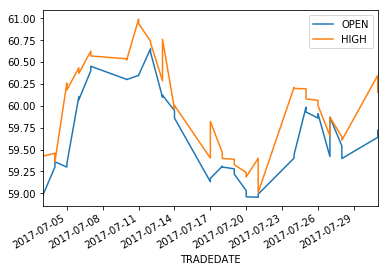

In [12]:
%matplotlib inline
dat.plot()

In [13]:
correlacao = dat.corr()
correlacao

,OPEN,HIGH
OPEN,1.000000,0.877961
HIGH,0.877961,1.000000


/Users/michel.fernandes/anaconda/lib/python3.6/site-packages/joblib/_multiprocessing_helpers.py:28: UserWarning: [Errno 28] No space left on device.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


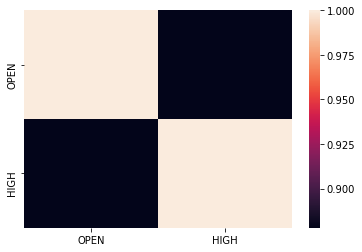

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlacao)

In [15]:
dat["OPEN"].unique()

array([ 58.98  ,  59.3   ,  59.36  ,  59.34  ,  60.1025,  60.07  ,
        60.4   ,  60.4522,  60.3025,  60.3   ,  60.3475,  60.35  ,
        60.6525,  60.61  ,  60.0975,  60.12  ,  59.945 ,  59.86  ,
        59.1325,  59.17  ,  59.31  ,  59.28  ,  59.22  ,  59.03  ,
        58.96  ,  58.955 ,  58.99  ,  59.4025,  59.44  ,  59.985 ,
        59.93  ,  59.91  ,  59.42  ,  59.87  ,  59.54  ,  59.3975,
        59.64  ,  59.7201])

In [16]:
dat["OPEN"].value_counts().head()

59.30    3
59.86    2
59.42    1
59.44    1
60.30    1
Name: OPEN, dtype: int64

### Entrada e Saída de Dados Externos
Utilizando importação e exportação de dados

#### Arquivos CSV (Caractere separador de vírgula)

In [17]:
data_frame_csv = pd.read_csv("exemplo.csv")
data_frame_csv

,Ano;Livros;Jogos;Cadernos
0,2015;111;53;32
1,2016;224;455;43
2,2017;434;567;65
3,2018;564;2333;77


In [18]:
data_frame_csv = pd.read_csv("exemplo.csv", sep=";")
data_frame_csv

,Ano,Livros,Jogos,Cadernos
0,2015,111,53,32
1,2016,224,455,43
2,2017,434,567,65
3,2018,564,2333,77


In [19]:
data_frame_csv = pd.read_csv("exemplo.csv", sep=";", header=None)
data_frame_csv

,0,1,2,3
0,Ano,Livros,Jogos,Cadernos
1,2015,111,53,32
2,2016,224,455,43
3,2017,434,567,65
4,2018,564,2333,77


In [20]:
data_frame_csv = pd.read_csv("exemplo.csv", sep=";", header=None, nrows=3)
data_frame_csv

,0,1,2,3
0,Ano,Livros,Jogos,Cadernos
1,2015,111,53,32
2,2016,224,455,43


In [21]:
data_frame_csv = pd.read_csv("exemplo.csv", sep=";", names=["Ano", "Livros", "Jogos", "Cadernos"], skiprows=2)
data_frame_csv

,Ano,Livros,Jogos,Cadernos
0,2016,224,455,43
1,2017,434,567,65
2,2018,564,2333,77


In [22]:
data_frame_desc = data_frame_csv.describe()
data_frame_desc

,Ano,Livros,Jogos,Cadernos
count,3.0,3.000000,3.000000,3.000000
mean,2017.0,407.333333,1118.333333,61.666667
std,1.0,171.561456,1053.421726,17.243356
min,2016.0,224.000000,455.000000,43.000000
25%,2016.5,329.000000,511.000000,54.000000
50%,2017.0,434.000000,567.000000,65.000000
75%,2017.5,499.000000,1450.000000,71.000000
max,2018.0,564.000000,2333.000000,77.000000


In [23]:
data_frame_desc.to_csv("exemplo_desc.csv")

#### Arquivos JSON

In [24]:
import json

data = json.load(open("exemplo.json"))
print(data)

[{'state': 'Florida', 'shortname': 'FL', 'info': {'owner': 'Edmund Kirsh'}, 'cars': [{'name': 'Tesla', 'model': 'Model X'}, {'name': 'Ferrari', 'model': 'F50'}]}, {'state': 'Ohio', 'shortname': 'OH', 'info': {'owner': 'Antonio Valdespino'}, 'cars': [{'name': 'Fiat', 'model': '500'}]}]


In [25]:
data_frame_json = pd.read_json("exemplo.json")
data_frame_json

,cars,info,shortname,state
0,"[{'name': 'Tesla', 'model': 'Model X'}, {'name...",{'owner': 'Edmund Kirsh'},FL,Florida
1,"[{'name': 'Fiat', 'model': '500'}]",{'owner': 'Antonio Valdespino'},OH,Ohio


In [26]:
from pandas.io.json import json_normalize

In [27]:
data_frame_json = json_normalize(data, "cars", ['state', 'shortname', ['info', 'owner']])
data_frame_json

,model,name,state,shortname,info.owner
0,Model X,Tesla,Florida,FL,Edmund Kirsh
1,F50,Ferrari,Florida,FL,Edmund Kirsh
2,500,Fiat,Ohio,OH,Antonio Valdespino


In [28]:
data_frame_json_desc = data_frame_json.describe()
data_frame_json_desc

,model,name,state,shortname,info.owner
count,3,3,3,3,3
unique,3,3,2,2,2
top,F50,Fiat,Florida,FL,Edmund Kirsh
freq,1,1,2,2,2


In [29]:
data_frame_json_desc.to_json("exemplo_desc.json")

#### Arquivos Excel

In [30]:
data_frame_excel = pd.read_excel("exemplo.xlsx")
data_frame_excel

,Filme,Avaliação,Custo
0,Avengers,3,210000
1,Avengers 2,4,250000
2,Avengers 3,4,400000
3,Iron Man,2,200000
4,Iron Man 2,2,200000
5,Iron Man 3,1,240000
6,Thor,4,240000
7,Thor 2,4,200000
8,Thor 3,5,230000
9,Captain America,5,180000


In [31]:
data_frame_excel = pd.read_excel("exemplo.xlsx", sheetname="Fonte_1")
data_frame_excel

,Filme,Avaliação,Custo
0,Avengers,4,200000
1,Avengers 2,2,250000
2,Avengers 3,5,400000
3,Iron Man,4,200000
4,Iron Man 2,3,150000
5,Iron Man 3,3,240000
6,Thor,3,120000
7,Thor 2,3,200000
8,Thor 3,4,230000
9,Captain America,4,180000


#### Fonte de dados SQL

In [32]:
import lib.mysql.connector as mysql

conn = mysql.connect(user='root', host='localhost', database='DBTarefa')
cursor = conn.cursor()

In [33]:
cursor.execute("SELECT * FROM FUNCIONARIO WHERE ID >= %s", (1,))

for row in cursor:
    id_funcionario = row[0]
    cod_funcionario = row[1]
    nome_funcionario = row[2]
    print(str(id_funcionario) + ' ' + cod_funcionario + ' ' + nome_funcionario)


1 2000 Alberto Santos
2 12345 Andre Gonçalves


In [34]:
data_frame_mysql = pd.read_sql("SELECT * FROM FUNCIONARIO", conn)
data_frame_mysql

,ID,CODIGO_FUNCIONARIO,NOME_FUNCIONARIO
0,1,2000,Alberto Santos
1,2,12345,Andre Gonçalves


### Merging
Unindo dois dataframes

In [35]:
data_frame_1 = DataFrame({"chave": ['A','B','B','C'], "data_frame_1": np.arange(4)})
data_frame_1

,chave,data_frame_1
0,A,0
1,B,1
2,B,2
3,C,3


In [36]:
data_frame_2 = DataFrame({"chave": ['C','D','E'], "data_frame_2": [4, 5, 6]})
data_frame_2

,chave,data_frame_2
0,C,4
1,D,5
2,E,6


In [37]:
pd.merge(data_frame_1, data_frame_2)

,chave,data_frame_1,data_frame_2
0,C,3,4


In [38]:
pd.merge(data_frame_1, data_frame_2, on="chave", how="left")

,chave,data_frame_1,data_frame_2
0,A,0,NaN
1,B,1,NaN
2,B,2,NaN
3,C,3,4.0


In [39]:
pd.merge(data_frame_1, data_frame_2, on="chave", how="right")

,chave,data_frame_1,data_frame_2
0,C,3.0,4
1,D,NaN,5
2,E,NaN,6


In [40]:
pd.merge(data_frame_1, data_frame_2, on="chave", how="inner")

,chave,data_frame_1,data_frame_2
0,C,3,4


In [41]:
pd.merge(data_frame_1, data_frame_2, on="chave", how="outer")

,chave,data_frame_1,data_frame_2
0,A,0.0,NaN
1,B,1.0,NaN
2,B,2.0,NaN
3,C,3.0,4.0
4,D,NaN,5.0
5,E,NaN,6.0


In [42]:
data_frame_1 = pd.read_excel("exemplo_merge.xlsx", sheetname="Fonte_1")
data_frame_1

,Filme,Estado,Avaliação
0,Avengers,RJ,2
1,Avengers 2,RJ,3
2,Avengers 3,SP,3


In [43]:
data_frame_2 = pd.read_excel("exemplo_merge.xlsx", sheetname="Fonte_2")
data_frame_2

,Filme,Estado,Avaliação
0,Avengers,SP,3
1,Avengers 2,RJ,4
2,Avengers 3,SP,4


In [44]:
pd.merge(data_frame_1, data_frame_2, on=["Filme", "Estado"], how="outer")

,Filme,Estado,Avaliação_x,Avaliação_y
0,Avengers,RJ,2.0,NaN
1,Avengers 2,RJ,3.0,4.0
2,Avengers 3,SP,3.0,4.0
3,Avengers,SP,NaN,3.0


In [45]:
pd.merge(data_frame_1, data_frame_2, on=["Filme", "Estado"], how="outer", suffixes=("_Fonte_1", "_Fonte_2"))

,Filme,Estado,Avaliação_Fonte_1,Avaliação_Fonte_2
0,Avengers,RJ,2.0,NaN
1,Avengers 2,RJ,3.0,4.0
2,Avengers 3,SP,3.0,4.0
3,Avengers,SP,NaN,3.0


### Concatenate
Concatenação de conjunto de dados (Series e Dataframes)

In [46]:
series_1 = Series([1, 2, 3], index=['A', 'B', 'C'])
series_1

A    1
B    2
C    3
dtype: int64

In [47]:
series_2 = Series([4, 5, 6], index=['C', 'D', 'E'])
series_2

C    4
D    5
E    6
dtype: int64

In [48]:
pd.concat([series_1, series_2])

A    1
B    2
C    3
C    4
D    5
E    6
dtype: int64

In [49]:
pd.concat([series_1, series_2], axis=1)

,0,1
A,1.0,NaN
B,2.0,NaN
C,3.0,4.0
D,NaN,5.0
E,NaN,6.0


In [50]:
pd.concat([series_1, series_2], axis=1, keys=["chave_1", "chave_2"])

,chave_1,chave_2
A,1.0,NaN
B,2.0,NaN
C,3.0,4.0
D,NaN,5.0
E,NaN,6.0


Índice hierárquico

In [51]:
pd.concat([series_1, series_2], keys=["chave_1", "chave_2"])

chave_1  A    1
         B    2
         C    3
chave_2  C    4
         D    5
         E    6
dtype: int64

In [52]:
data_frame_1 = DataFrame(np.random.randn(4,3), columns=['A', 'B', 'C'])
data_frame_1

,A,B,C
0,-1.933020,1.820001,-1.624279
1,1.727732,0.937220,-2.123469
2,-1.516399,-0.998237,1.594119
3,0.973869,0.483829,0.009492


In [53]:
data_frame_2 = DataFrame(np.random.randn(4,3), columns=['D', 'E', 'F'])
data_frame_2

,D,E,F
0,-1.991545,-2.355091,-0.360567
1,-0.789864,0.563573,0.704449
2,2.044695,-0.610702,-0.471310
3,-0.027509,0.428622,0.419085


In [54]:
pd.concat([data_frame_1, data_frame_2])

,A,B,C,D,E,F
0,-1.933020,1.820001,-1.624279,NaN,NaN,NaN
1,1.727732,0.937220,-2.123469,NaN,NaN,NaN
2,-1.516399,-0.998237,1.594119,NaN,NaN,NaN
3,0.973869,0.483829,0.009492,NaN,NaN,NaN
0,NaN,NaN,NaN,-1.991545,-2.355091,-0.360567
1,NaN,NaN,NaN,-0.789864,0.563573,0.704449
2,NaN,NaN,NaN,2.044695,-0.610702,-0.471310
3,NaN,NaN,NaN,-0.027509,0.428622,0.419085


In [55]:
pd.concat([data_frame_1, data_frame_2], ignore_index=True)

,A,B,C,D,E,F
0,-1.933020,1.820001,-1.624279,NaN,NaN,NaN
1,1.727732,0.937220,-2.123469,NaN,NaN,NaN
2,-1.516399,-0.998237,1.594119,NaN,NaN,NaN
3,0.973869,0.483829,0.009492,NaN,NaN,NaN
4,NaN,NaN,NaN,-1.991545,-2.355091,-0.360567
5,NaN,NaN,NaN,-0.789864,0.563573,0.704449
6,NaN,NaN,NaN,2.044695,-0.610702,-0.471310
7,NaN,NaN,NaN,-0.027509,0.428622,0.419085


### Reshaping
Transformando Series em Dataframes e vice-versa

In [56]:
data_frame_1 = DataFrame(np.arange(8).reshape(2,4), index=pd.Index(["SP", "RJ"], name="Cidade"), columns=pd.Index(["Casa", "Prédio", "Mercado", "Oficina"], name="Estabelecimentos"))
data_frame_1

Estabelecimentos,Casa,Prédio,Mercado,Oficina
Cidade,,,,
SP,0,1,2,3
RJ,4,5,6,7


In [57]:
type(data_frame_1)

pandas.core.frame.DataFrame

In [58]:
data_frame_1_stack = data_frame_1.stack()
data_frame_1_stack

Cidade  Estabelecimentos
SP      Casa                0
        Prédio              1
        Mercado             2
        Oficina             3
RJ      Casa                4
        Prédio              5
        Mercado             6
        Oficina             7
dtype: int64

In [59]:
type(data_frame_1_stack)

pandas.core.series.Series

In [60]:
data_frame_1_stack.unstack()

Estabelecimentos,Casa,Prédio,Mercado,Oficina
Cidade,,,,
SP,0,1,2,3
RJ,4,5,6,7


In [61]:
data_frame_1_stack.unstack("Estabelecimentos")

Estabelecimentos,Casa,Prédio,Mercado,Oficina
Cidade,,,,
SP,0,1,2,3
RJ,4,5,6,7


In [62]:
data_frame_1_stack.unstack("Cidade")

Cidade,SP,RJ
Estabelecimentos,,
Casa,0,4
Prédio,1,5
Mercado,2,6
Oficina,3,7


In [63]:
serie_1 = Series([1, 2, 3], index=["A", "B", "C"])
serie_2 = Series([4, 5, 6], index=["D", "E", "F"])

In [64]:
serie_3 = pd.concat([serie_1, serie_2], keys=["Grupo 1", "Grupo 2"])
serie_3

Grupo 1  A    1
         B    2
         C    3
Grupo 2  D    4
         E    5
         F    6
dtype: int64

In [65]:
data_frame_2 = serie_3.unstack()
data_frame_2

,A,B,C,D,E,F
Grupo 1,1.0,2.0,3.0,NaN,NaN,NaN
Grupo 2,NaN,NaN,NaN,4.0,5.0,6.0


In [66]:
data_frame_2.stack()

Grupo 1  A    1.0
         B    2.0
         C    3.0
Grupo 2  D    4.0
         E    5.0
         F    6.0
dtype: float64

In [67]:
data_frame_2.stack(dropna=False)

Grupo 1  A    1.0
         B    2.0
         C    3.0
         D    NaN
         E    NaN
         F    NaN
Grupo 2  A    NaN
         B    NaN
         C    NaN
         D    4.0
         E    5.0
         F    6.0
dtype: float64

### Pivoting
Pivotção de um dataframe

In [68]:
data_frame_1 = pd.read_excel("exemplo_pivoting.xlsx")
data_frame_1

,Data,Candidato,Votos
0,2018-01-01,Ivanir Bolsotaro,121231
1,2018-01-01,Geraldo Almirante,21321
2,2018-01-01,Luis da Silva,3211
3,2018-01-01,João Cória,1111
4,2018-01-01,Lenin José,982
5,2018-05-01,Ivanir Bolsotaro,102121
6,2018-05-01,Geraldo Almirante,21421
7,2018-05-01,Luis da Silva,2341
8,2018-05-01,João Cória,987
9,2018-05-01,Lenin José,876


In [69]:
data_frame_1.pivot("Data", "Candidato", "Votos")

Candidato,Geraldo Almirante,Ivanir Bolsotaro,João Cória,Lenin José,Luis da Silva
Data,,,,,
2018-01-01,21321,121231,1111,982,3211
2018-05-01,21421,102121,987,876,2341


In [70]:
pd.pivot_table(data_frame_1, values="Votos", index=["Candidato"], aggfunc=np.sum)

,Votos
Candidato,
Geraldo Almirante,42742
Ivanir Bolsotaro,223352
João Cória,2098
Lenin José,1858
Luis da Silva,5552


### Mapping
Substituição de valores utilizando dicionários

In [71]:
data_frame_1 = DataFrame({"cidade":["Santo André", "Petrópolis", "Belo Horizonte"], "vendas":[1231, 3312, 3212]})
data_frame_1

,cidade,vendas
0,Santo André,1231
1,Petrópolis,3312
2,Belo Horizonte,3212


In [72]:
mapeamento_estado = {"Santo André": "SP", "Belo Horizonte": "MG", "Petrópolis": "RJ"}

In [73]:
data_frame_1["estado"] = data_frame_1["cidade"].map(mapeamento_estado)
data_frame_1

,cidade,vendas,estado
0,Santo André,1231,SP
1,Petrópolis,3312,RJ
2,Belo Horizonte,3212,MG


In [74]:
data_frame_1["cidade"] = data_frame_1["cidade"].map(mapeamento_estado)

In [75]:
data_frame_1

,cidade,vendas,estado
0,SP,1231,SP
1,RJ,3312,RJ
2,MG,3212,MG


## Grouping & Aggregation
Agrupamento de colunas para operações de redução e agregaçÃo

In [76]:
data_frame_1 = DataFrame({"Coluna 1": ["A", "A", "B", "B", "C"], "Coluna 2": [1, 2, 1, 2, 1], "Coluna 3": np.random.randn(5), "Coluna 4": np.random.randn(5)})
data_frame_1

,Coluna 1,Coluna 2,Coluna 3,Coluna 4
0,A,1,0.258153,1.527574
1,A,2,-0.265464,-0.290232
2,B,1,0.266418,-0.052136
3,B,2,-0.697149,-0.051092
4,C,1,0.173840,0.720714


In [77]:
group_1 = data_frame_1["Coluna 3"].groupby(data_frame_1["Coluna 1"])
group_1.mean()

Coluna 1
A   -0.003655
B   -0.215366
C    0.173840
Name: Coluna 3, dtype: float64

In [78]:
group_1.max()

Coluna 1
A    0.258153
B    0.266418
C    0.173840
Name: Coluna 3, dtype: float64

In [79]:
data_frame_1.groupby(["Coluna 1"]).mean()

,Coluna 2,Coluna 3,Coluna 4
Coluna 1,,,
A,1.5,-0.003655,0.618671
B,1.5,-0.215366,-0.051614
C,1.0,0.173840,0.720714


In [80]:
group_dict = dict(list(data_frame_1.groupby("Coluna 1")))

In [81]:
group_dict

{'A':   Coluna 1  Coluna 2  Coluna 3  Coluna 4
 0        A         1  0.258153  1.527574
 1        A         2 -0.265464 -0.290232,
 'B':   Coluna 1  Coluna 2  Coluna 3  Coluna 4
 2        B         1  0.266418 -0.052136
 3        B         2 -0.697149 -0.051092,
 'C':   Coluna 1  Coluna 2  Coluna 3  Coluna 4
 4        C         1   0.17384  0.720714}

In [82]:
group_dict["A"]

,Coluna 1,Coluna 2,Coluna 3,Coluna 4
0,A,1,0.258153,1.527574
1,A,2,-0.265464,-0.290232


In [83]:
coluna_2_group = data_frame_1.groupby(["Coluna 1", "Coluna 2"])[["Coluna 4"]]
coluna_2_group.mean()

Coluna 4
Coluna 1 Coluna 2          
A        1         1.527574
         2        -0.290232
B        1        -0.052136
         2        -0.051092
C        1         0.720714

Agregação

In [84]:
def max_to_min(arr):
    return arr.max() - arr.min()

In [85]:
group_2 = data_frame_1.groupby(["Coluna 1"])
group_2.describe()

Coluna 2                                           Coluna 3  \
            count mean       std  min   25%  50%   75%  max    count   
Coluna 1                                                               
A             2.0  1.5  0.707107  1.0  1.25  1.5  1.75  2.0      2.0   
B             2.0  1.5  0.707107  1.0  1.25  1.5  1.75  2.0      2.0   
C             1.0  1.0       NaN  1.0  1.00  1.0  1.00  1.0      1.0   

                      ...                        Coluna 4                      \
              mean    ...          75%       max    count      mean       std   
Coluna 1              ...                                                       
A        -0.003655    ...     0.127249  0.258153      2.0  0.618671  1.285383   
B        -0.215366    ...     0.025526  0.266418      2.0 -0.051614  0.000738   
C         0.173840    ...     0.173840  0.173840      1.0  0.720714       NaN   

                                                            
               min       25%       50%       75%       max  
Coluna 1                                                    
A        -0.290232  0.164219  0.618671  1.073122  1.527574  
B        -0.052136 -0.051875 -0.051614 -0.051353 -0.051092  
C         0.720714  0.720714  0.720714  0.720714  0.720714  

[3 rows x 24 columns]

In [86]:
group_2.agg(max_to_min)

,Coluna 2,Coluna 3,Coluna 4
Coluna 1,,,
A,1,0.523617,1.817806
B,1,0.963567,0.001043
C,0,0.000000,0.000000


In [87]:
group_2.agg("mean")

,Coluna 2,Coluna 3,Coluna 4
Coluna 1,,,
A,1.5,-0.003655,0.618671
B,1.5,-0.215366,-0.051614
C,1.0,0.173840,0.720714


### Cross Tabulation
Cálculo de frequência de termos

In [88]:
data_frame_1 = pd.read_excel("exemplo_crosstabulation.xlsx")
data_frame_1

,Sujeito,Tipo,Condição
0,1,Jovem,Demência
1,2,Adulto,Saudável
2,3,Adulto,Demência
3,4,Idoso,Saudável
4,5,Idoso,Demência
5,6,Idoso,Saudável
6,7,Adulto,Saudável
7,8,Jovem,Saudável
8,9,Jovem,Demência
9,10,Idoso,Demência


In [89]:
pd.crosstab(data_frame_1.Tipo, data_frame_1.Condição, margins=True)

Condição,Demência,Saudável,All
Tipo,,,
Adulto,1,2,3
Idoso,2,2,4
Jovem,2,1,3
All,5,5,10


In [90]:
pd.crosstab(data_frame_1.Tipo, data_frame_1.Condição, margins=False)

Condição,Demência,Saudável
Tipo,,
Adulto,1,2
Idoso,2,2
Jovem,2,1
